In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("EastWestAirlines.csv")

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.shape

(3999, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
def standardize(x):
    x = (x-x.mean())/((x.std()))
    return x
df_scaled = standardize(data.iloc[:,1:])
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [8]:
def minmax(x):
    x=(x-x.min())/(x.max()-x.min())
    return x
df_norm=minmax(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# KMeans Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(data.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

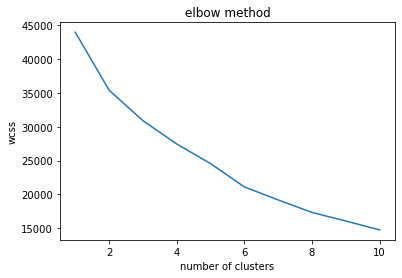

In [10]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.ylabel('wcss')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.show()

In [11]:
clusters_new=KMeans(5,random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [12]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [13]:
data_KM=data.copy()

In [14]:
data_KM["KMeans_n5"]=clusters_new.labels_
data_KM

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n5
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
clusters_new.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [16]:
data_KM.groupby('KMeans_n5').agg(["mean"]).reset_index()

,KMeans_n5,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1731.100000,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,2237.743286,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,1593.586764,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [17]:
data_KM

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n5
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [18]:
data_KM['KMeans_n5'].value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: KMeans_n5, dtype: int64

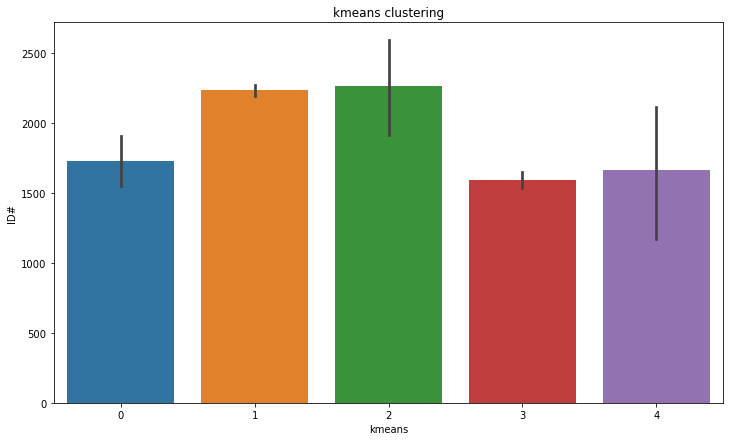

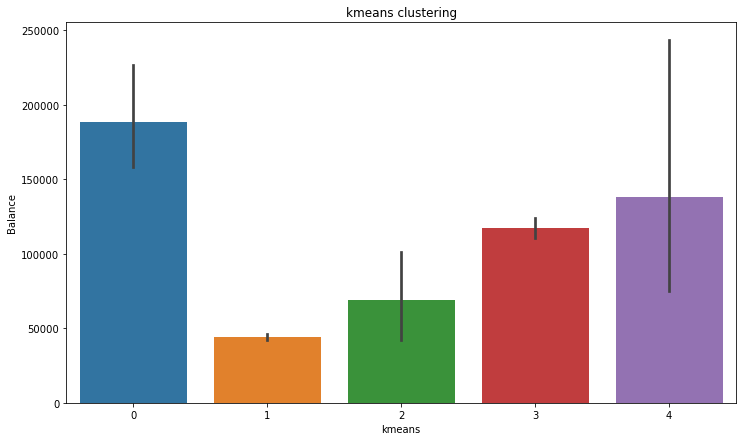

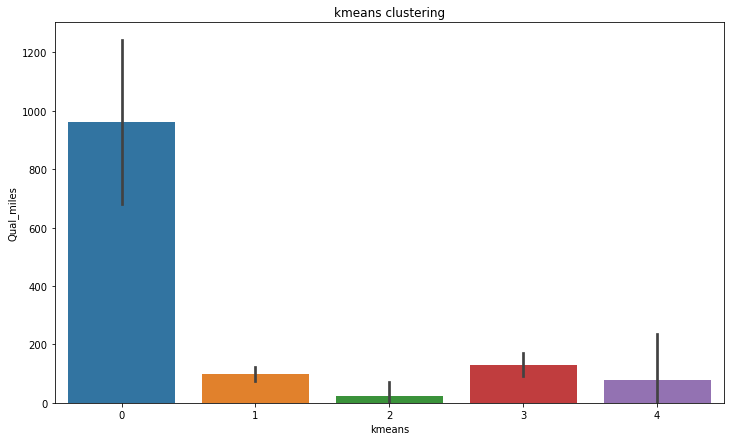

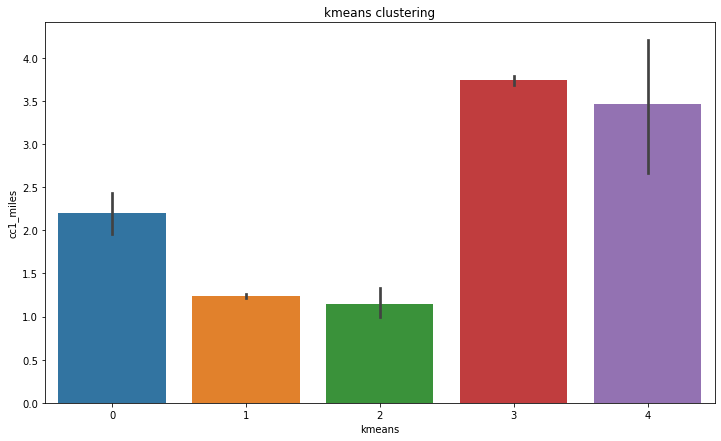

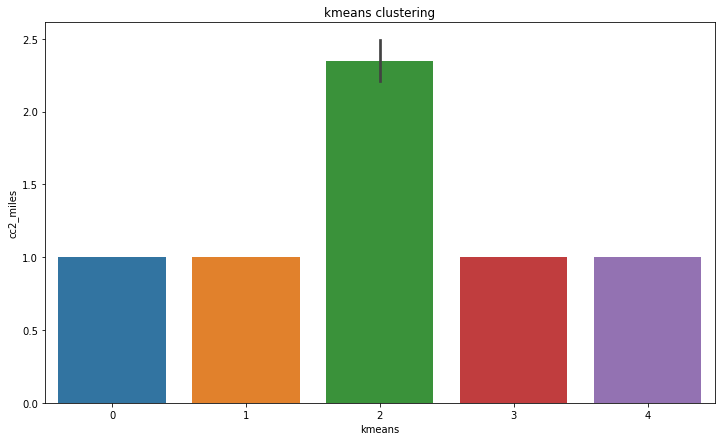

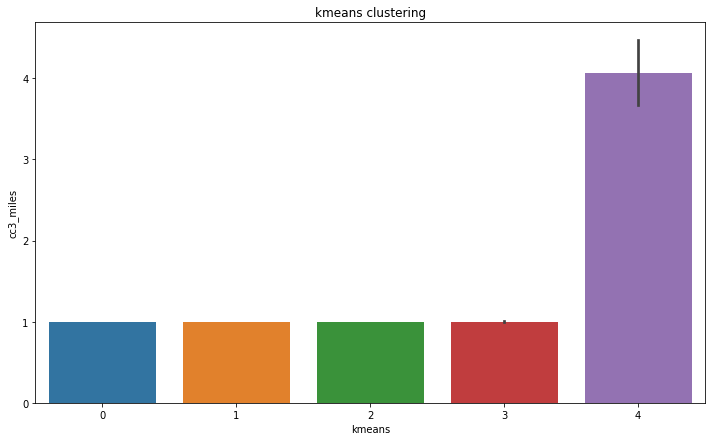

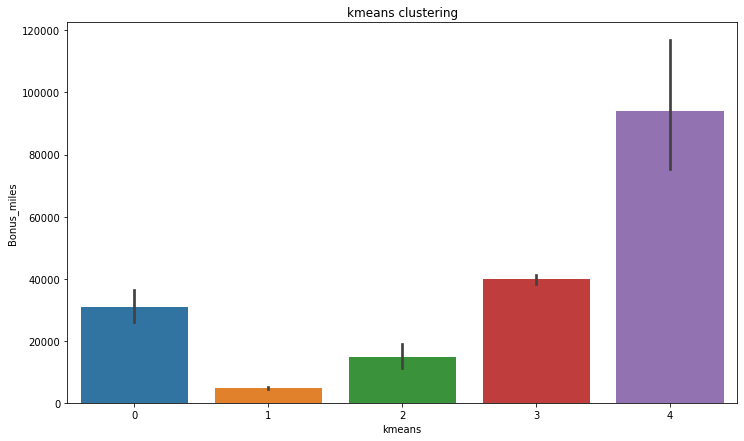

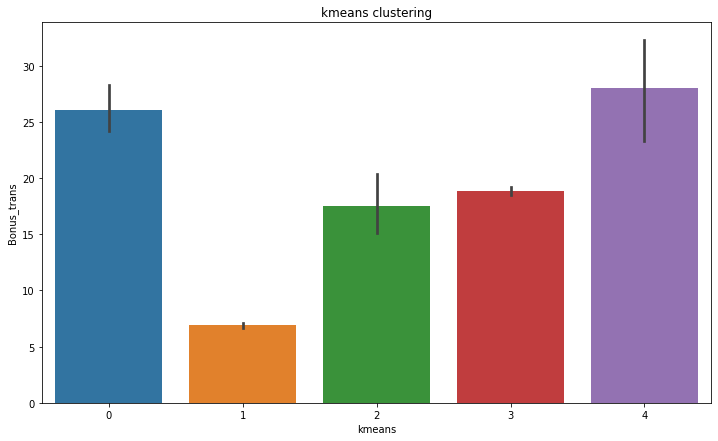

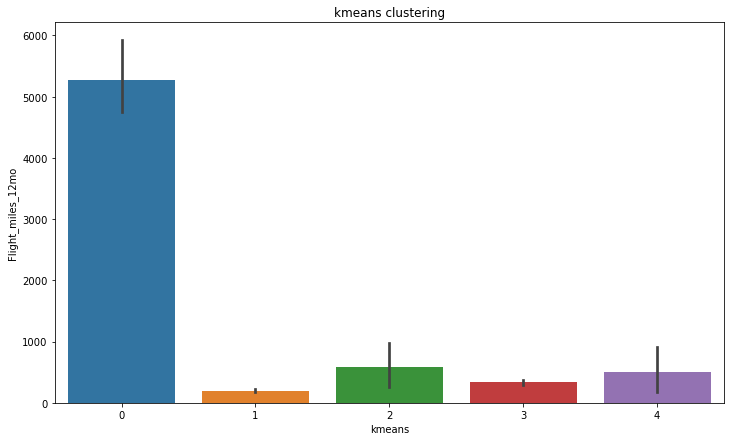

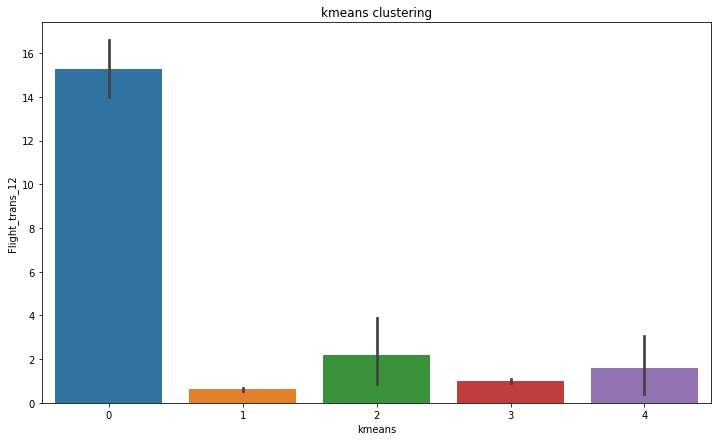

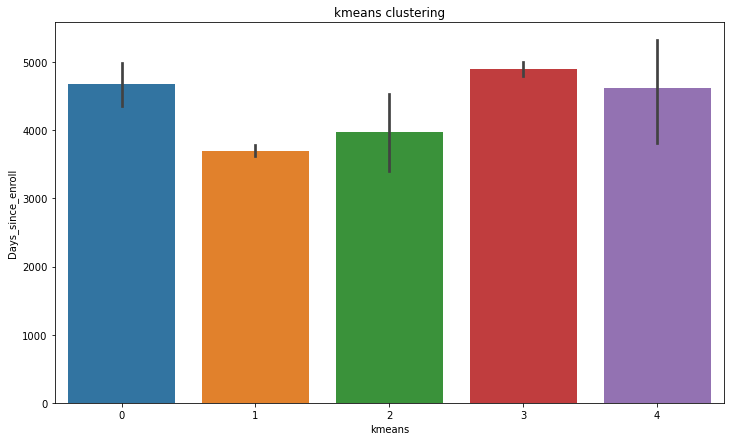

In [19]:
for i in range(0,11):
    plt.figure(figsize=(12, 7))  
    sns.barplot(y=data_KM.iloc[:,i],x=data_KM["KMeans_n5"])
    plt.title(f"kmeans clustering")
    plt.ylabel(data_KM.columns[i])
    plt.xlabel('kmeans')
    plt.show()

# DBSCAN 

In [20]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps=5,min_samples=13)
dbscan.fit(scaled_df)

DBSCAN(eps=5, min_samples=13)

In [22]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
data_DB=data.copy()

In [24]:
data_DB['clusters']=dbscan.labels_

In [25]:
data_DB

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [26]:
data_DB.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1788.555556,267161.185185,566.629630,2.962963,1.0,2.814815,79186.074074,33.518519,4339.037037,11.444444,4529.481481,0.666667
1,0,2013.588445,72322.897429,142.533724,2.063375,1.0,1.000000,16745.368542,11.386358,432.058030,1.295241,4117.373123,0.368033
2,1,2212.000000,52231.400000,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
3,2,2300.107143,77793.642857,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857


In [27]:
metrics.silhouette_score(scaled_df,dbscan.labels_)


0.5474248634702347

In [28]:
data_DB['clusters'].value_counts()

 0    3929
 2      28
-1      27
 1      15
Name: clusters, dtype: int64

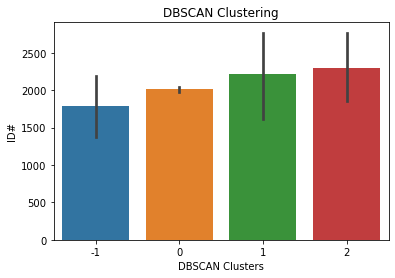

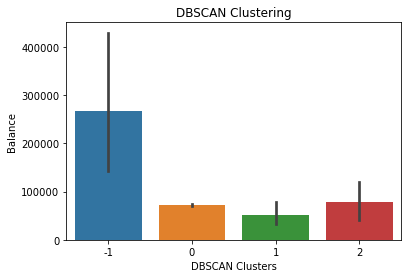

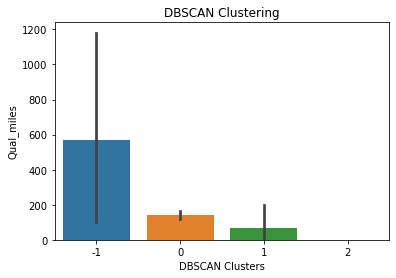

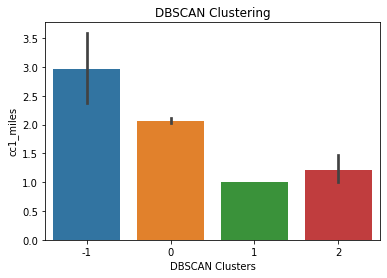

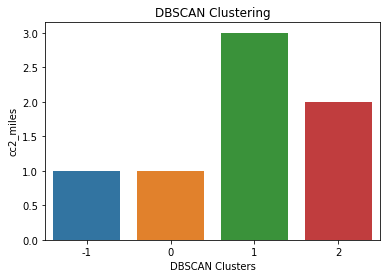

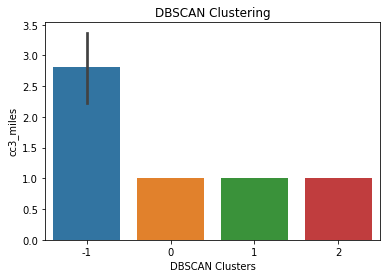

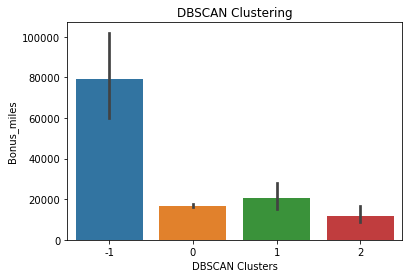

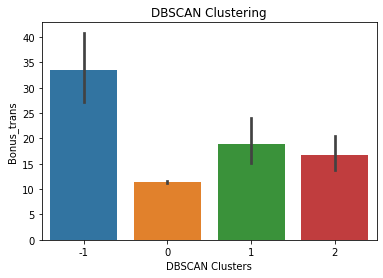

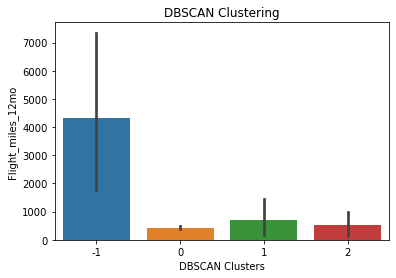

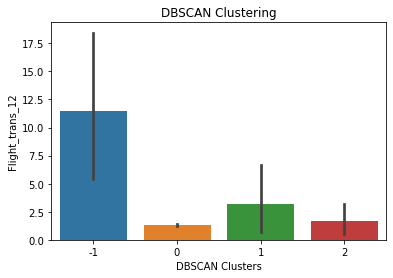

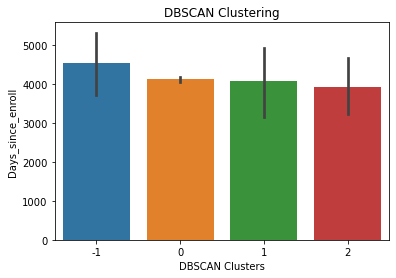

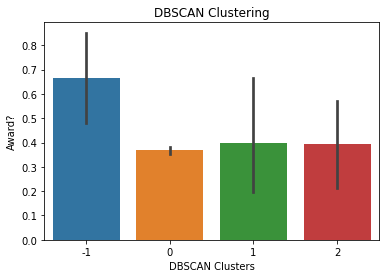

In [29]:
for i in range(0,12):
    sns.barplot(y=data_DB.iloc[:,i],x=data_DB["clusters"])
    plt.xlabel("DBSCAN Clusters")
    plt.ylabel(data_DB.columns[i])
    plt.title(f"DBSCAN Clustering")
    plt.show()


# Hierarchical clustering

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

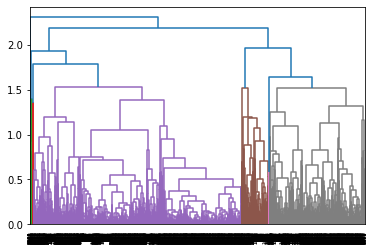

In [49]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [41]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=hc.fit_predict(df_norm)

In [42]:
data_HC=data.copy()

In [43]:
data_HC['clusters']=y_hc

In [44]:
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [45]:
metrics.silhouette_score(scaled_df,y_hc)

0.24966907173038302

In [46]:
data_HC

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [47]:
data_HC.groupby("clusters").agg(["mean"]).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2169.576353,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


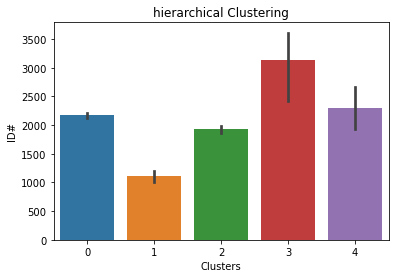

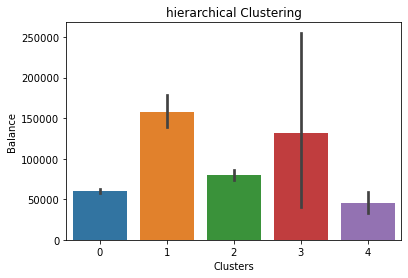

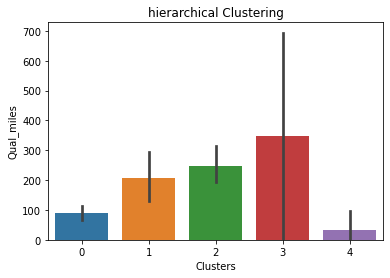

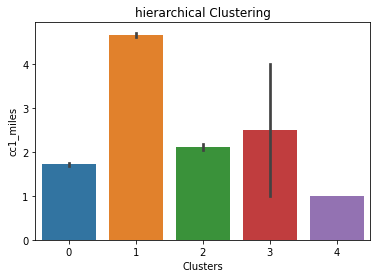

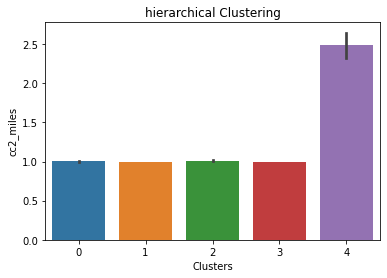

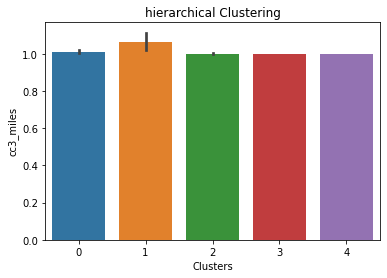

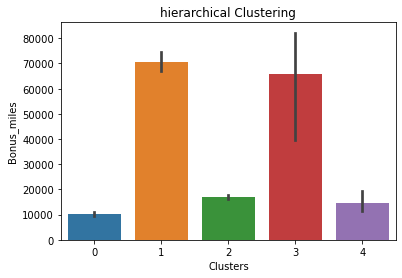

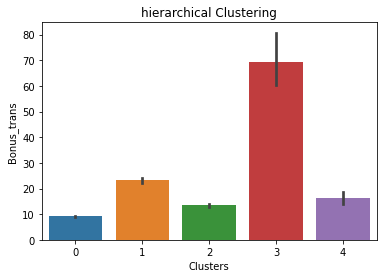

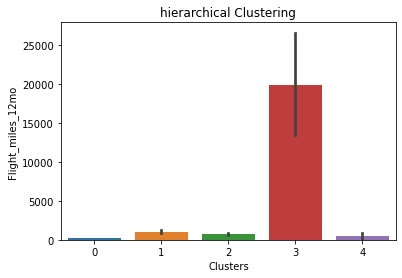

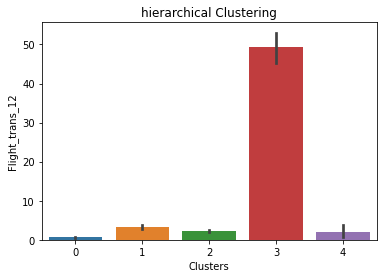

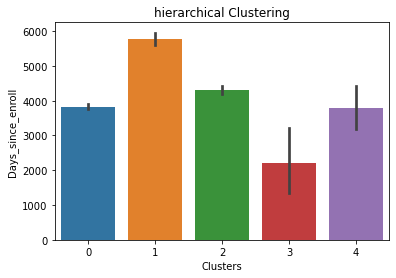

In [48]:
for i in range(0,11):
    sns.barplot(y=data_HC.iloc[:,i],x=data_HC["clusters"])
    plt.xlabel("Clusters")
    plt.ylabel(data_HC.columns[i])
    plt.title(f"hierarchical Clustering")
    plt.show()

I got five clusters from the airline dataset